In [2]:
# import libraries & packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()
%matplotlib inline

In [3]:
# import libraries & packages
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [4]:
# import train & test dataset
train = pd.read_csv('C:\\Users\\Roma\\Downloads\\BigMart Sales Data\\Train.csv')
test = pd.read_csv('C:\\Users\\Roma\\Downloads\\BigMart Sales Data\\Test.csv')

In [4]:
# rows and columns
train.shape, test.shape

((8523, 12), (5681, 11))

In [5]:
# missing values in Train
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# Train : Percentage of missing values
train.isna().sum()/train.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [6]:
# missing values in Test
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
# Test : Percentage of missing values 
test.isna().sum()/test.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [9]:
# data types (Train)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# No. of Categorical & Numerical features in Train & Test

categorical = train.select_dtypes(include = [np.object])
print("Categorical Features in Train Set:", categorical.shape[1])

numerical = train.select_dtypes(include = [np.float64, np.int64])
print("Numerical Features in Train Set:", numerical.shape[1])

categorical = test.select_dtypes(include = [np.object])
print("Categorical Features in Test Set:", categorical.shape[1])

numerical = test.select_dtypes(include = [np.float64, np.int64])
print("Numerical Features in Test Set:", numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 5
Categorical Features in Test Set: 7
Numerical Features in Test Set: 4


In [12]:
# Descriptive Statistics : Train
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
# Descriptive Statistics : Test
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


## Step 3. Data Cleaning
Why missing values treatment is required?
Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.


In [7]:
# Features in the dataset
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


### 1. Item weight

In [17]:
# missing values in Train & Test
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(1463, 976)

#### Checking for Outliers in Train & Test

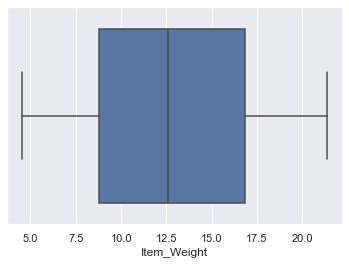

In [18]:
sns.boxplot('Item_Weight', data=train)

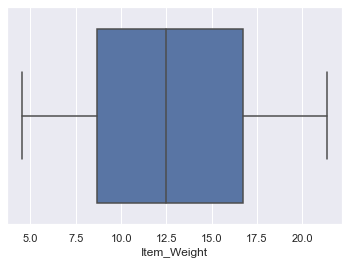

In [19]:
sns.boxplot('Item_Weight',data=test)

#### Imputation for the missing values
Filling the missing values with the mean of the records for both Train & Test.

In [8]:
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [9]:
train['Item_Weight'].isnull().sum(), test['Item_Weight'].isnull().sum()

(0, 0)

### 2. Outlet Size

In [10]:
# missing values for Train & Test
train['Outlet_Size'].isnull().sum(), test['Outlet_Size'].isnull().sum()

(2410, 1606)

In [24]:
# Categories in the feature "Outlet Size"
print(train['Outlet_Size'].value_counts())
print(test['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


#### Imputation with the Mode values of the records for Train as well as Test data.

In [11]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [12]:
train['Outlet_Size'].isnull().sum(), test['Outlet_Size'].isnull().sum()

(0, 0)

# Exploratory Data Analysis

In [27]:
# features in data
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [13]:
# Categories in the feature : "Item_Fat_Content"
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

#### Presence of categories with duplicate names : "Low Fat" , "LF", "low fat"  &  "Regular", "reg"

In [14]:
# Combining the categories with the same name
train['Item_Fat_Content'].replace(['low fat','LF','reg'], ['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'], ['Low Fat','Low Fat','Regular'], inplace = True)

In [15]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
train['Item_Fat_Content']=train['Item_Fat_Content'].astype(str)

In [17]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Creating a new column "Years_Est" to find the no. of years since establishment of the outlets

In [18]:
train['Years_Est'] = train['Outlet_Establishment_Year'].apply(lambda x: 2020 - x)
test['Years_Est'] = test['Outlet_Establishment_Year'].apply(lambda x: 2020 - x)

In [19]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Est
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


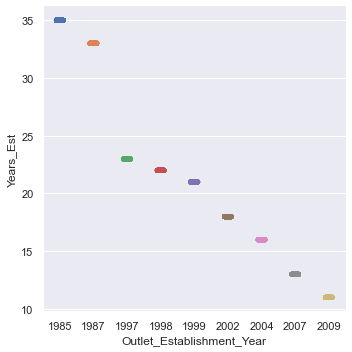

In [20]:
sns.catplot(x="Outlet_Establishment_Year",y="Years_Est", data=train);

## Univariate Analysis

In [40]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Years_Est'],
      dtype='object')

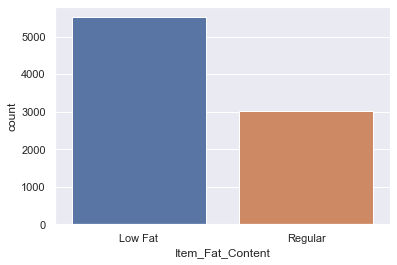

In [39]:
sns.countplot('Item_Fat_Content',data=train)

No. of "Low fat" items are higher in number than that of "Regular" items.

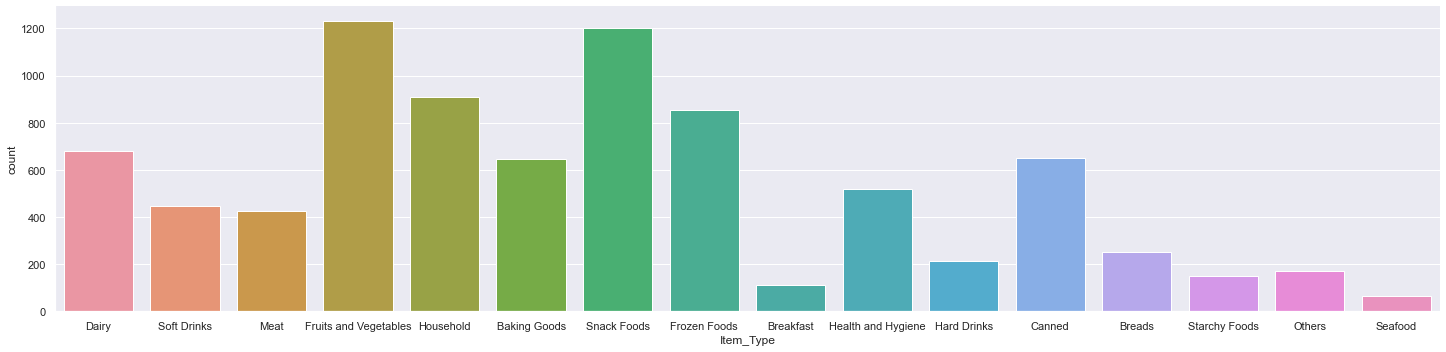

In [47]:
sns.catplot(x="Item_Type",kind = "count", data = train, aspect = 4);

"Fruits and Vegetables","Snack Foods" appear in most of the transactions.

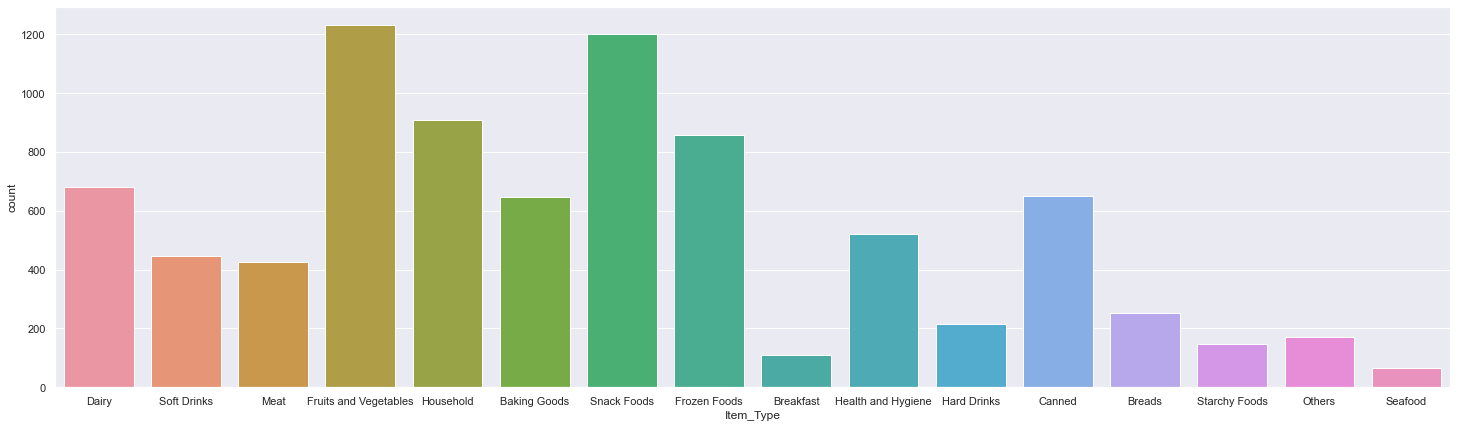

In [50]:
plt.figure(figsize=(25,7))
sns.countplot("Item_Type",data=train)

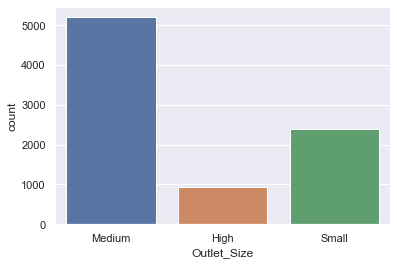

In [51]:
sns.countplot("Outlet_Size", data=train)

Most of the Outlets are "Medium" in size.

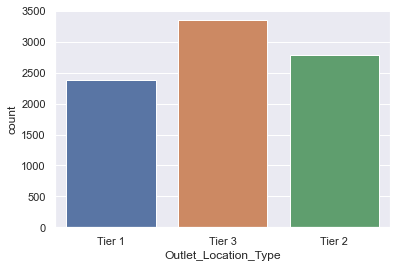

In [52]:
sns.countplot("Outlet_Location_Type",data=train)

Tier 3 cities have the most number of Outlets.

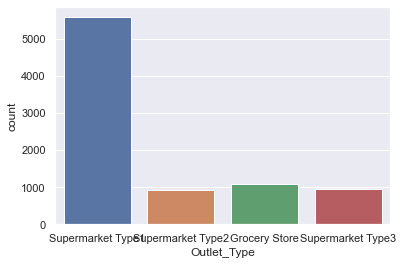

In [53]:
sns.countplot("Outlet_Type",data=train)

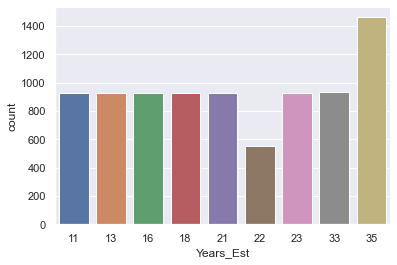

In [54]:
sns.countplot("Years_Est",data=train)

# Bivariate Analysis

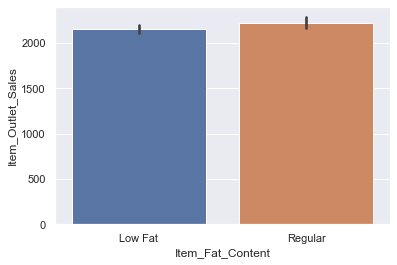

In [56]:
sns.barplot("Item_Fat_Content","Item_Outlet_Sales",data=train)

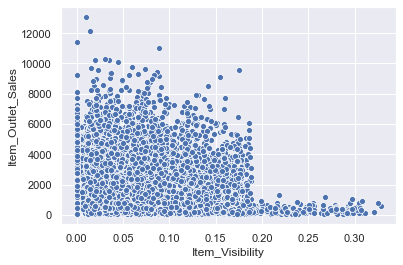

In [57]:
sns.scatterplot('Item_Visibility','Item_Outlet_Sales',data = train)

#### Observations:
Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

Lets consider it like missing information and impute it with mean visibility of that product.



In [21]:
train['Item_Visibility']=train['Item_Visibility'].replace(0,train['Item_Visibility'].mean())
test['Item_Visibility']=test['Item_Visibility'].replace(0,test['Item_Visibility'].mean())

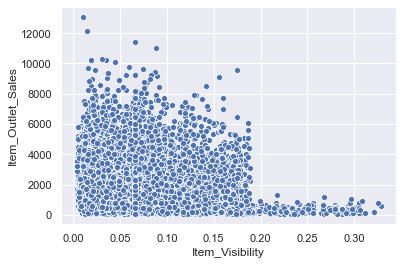

In [22]:
sns.scatterplot('Item_Visibility','Item_Outlet_Sales',data=train)

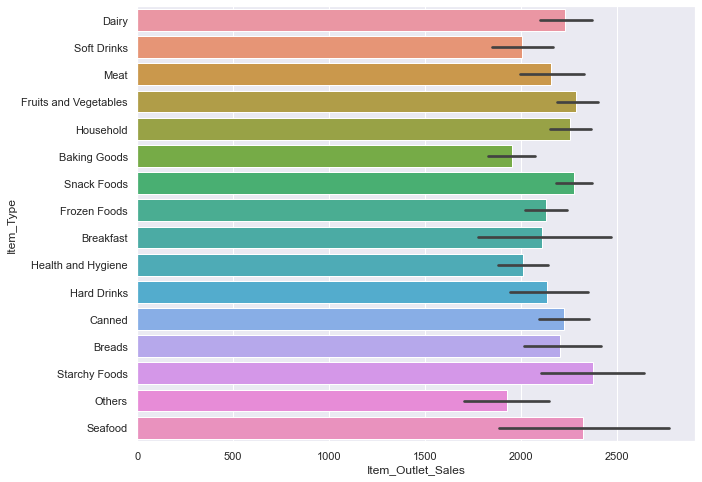

In [64]:
plt.figure(figsize=(10,8))
sns.barplot(y= 'Item_Type',x='Item_Outlet_Sales',data=train)

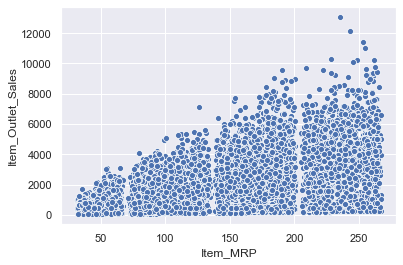

In [65]:
sns.scatterplot('Item_MRP','Item_Outlet_Sales',data=train)

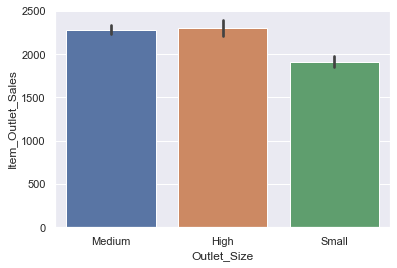

In [66]:
sns.barplot('Outlet_Size','Item_Outlet_Sales',data=train)

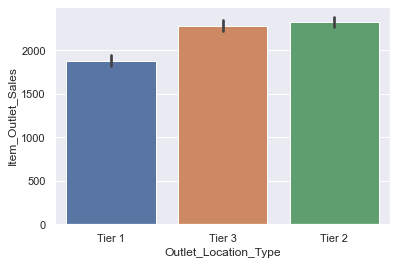

In [67]:
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',data=train)

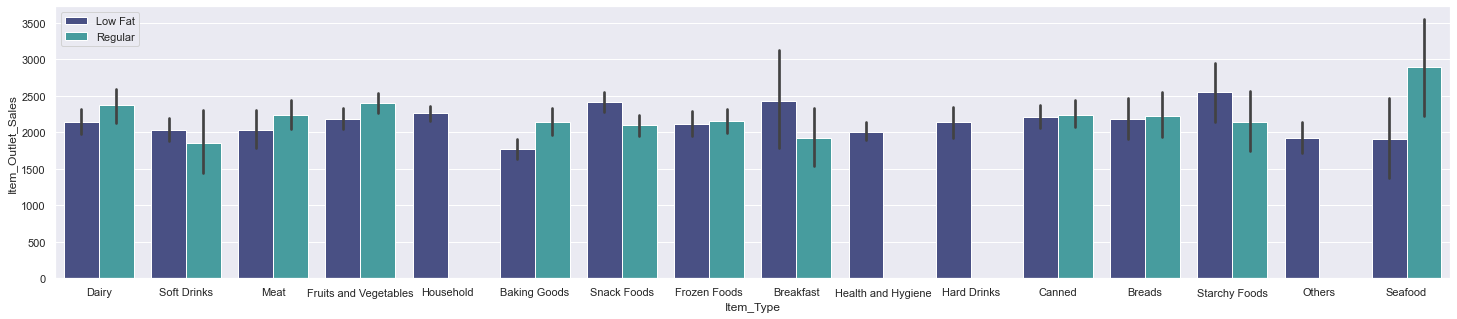

In [68]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=train,palette='mako')
plt.legend()

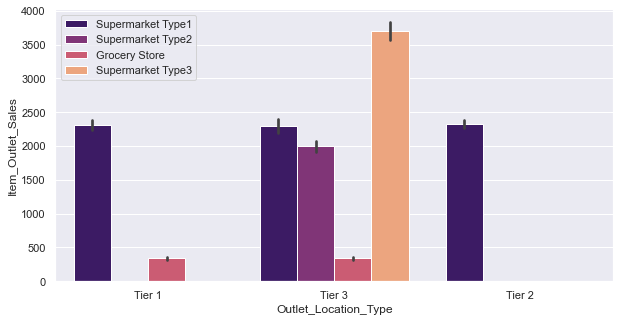

In [69]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=train,palette='magma')
plt.legend()

# Feature Engineering

In [23]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Est
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [24]:
le = LabelEncoder()
cat_to_num = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for i in cat_to_num:
    train[i] = le.fit_transform(train[i])
    
for i in cat_to_num:
    test[i] = le.fit_transform(test[i])

In [25]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Est
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,21
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,11
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,21
3,FDX07,19.20,1,0.066132,6,182.0950,OUT010,1998,1,2,0,732.3800,22
4,NCD19,8.93,0,0.066132,9,53.8614,OUT013,1987,0,2,1,994.7052,33


In [26]:
# Removing redundant columns

train = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
test = test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [37]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Years_Est'],
      dtype='object')

In [30]:
X = train[['Item_Weight','Item_Fat_Content','Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type','Years_Est']]

y = train[['Item_Outlet_Sales']]

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=22)

# Feature Scaling

In [32]:
features= ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']

In [38]:
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)


In [39]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
R2

0.4946245671867816

In [40]:
MAE= metrics.mean_absolute_error(y_test,y_pred)
MSE= metrics.mean_squared_error(y_test,y_pred)

In [41]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 933.3418289826435
mean squared error: 1561773.7754033813


In [42]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1249.7094763997677


In [43]:
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)

# Fitting the model on our trained dataset.
RF.fit(X_train,y_train)

# Making Predictions
y_pred = RF.predict(X_test)

<ipython-input-43-0881ca2e598d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,y_train)


In [44]:
coef3 = pd.Series(RF.feature_importances_, features).sort_values(ascending=False)
coef3

Item_MRP                0.543879
Outlet_Type             0.397488
Years_Established       0.057754
Item_Weight             0.000267
Outlet_Location_Type    0.000265
Item_Visibility         0.000248
Item_Type               0.000078
Outlet_Size             0.000021
Item_Fat_Content        0.000000
dtype: float64

In [46]:
def cross_val(model_name,model,X,y,cv):
    
    scores = cross_val_score(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),2)}')

In [47]:
cross_val(LR,LinearRegression(),X,y,5)

LinearRegression(normalize=True) Scores:
0.53
0.5
0.49
0.51
0.51
Average LinearRegression(normalize=True) score: 0.51


In [48]:
cross_val(RF,RandomForestRegressor(),X,y,5)

c:\users\roma\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\roma\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\roma\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\roma\appdata\local\programs\python\py

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) Scores:
0.57
0.52
0.52
0.55
0.57
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) score: 0.55
